In [1]:
using Printf, LinearAlgebra
using JLD2, GLMakie

include("../../MyTwoLayerNN/MyTwoLayerNN.jl")
using .MyTwoLayerNN

In [9]:
using CairoMakie
CairoMakie.activate!()

In [33]:
set_theme!(theme_latexfonts()) # Theme for plots 
update_theme!(Theme(fontsize = 27)) # 18 for testing and 36 for report

In [2]:
DATA_FOLDER = "Training data"
MYORANGE = Makie.RGB(213/255, 94/255, 0/255)
data = load(joinpath(@__DIR__, DATA_FOLDER, "begin a-lag.jld2")) # Default data

Dict{String, Any} with 3 entries:
  "t_data"        => [0.0, 100000.0, 200000.0, 300000.0, 400000.0, 500000.0, 60…
  "nn_data"       => TwoLayerNN{Float64, typeof(_ReLu), typeof(_∂ReLu)}[TwoLaye…
  "training_data" => TrainingData{Float64, Int64}([[-0.5], [-0.166667], [0.1666…

In [3]:
t_data = data["t_data"]
nn_data = data["nn_data"]
training_data = data["training_data"]

TrainingData{Float64, Int64}([[-0.5], [-0.16666666666666666], [0.16666666666666666], [0.5]], [0.25, 0.03333333333333333, 0.03333333333333333, 0.25], 1000.0, 10000)

In [4]:
# Extract training data
xflat = training_data.x |> Iterators.flatten |> collect
xmin, xmax = training_data.x |> Iterators.flatten |> extrema
xvals = range(xmin, xmax, length=100)

-0.5:0.010101010101010102:0.5

In [5]:
function color_of_zone(zone)
    zone == 0 && return :gray 
    zone == 1 && return :purple
    zone == 2 && return :blue
    zone == 3 && return :green
    zone == 4 && return MYORANGE
end

function zone_neuron(w, b)
    sum(x -> (b > -w * x), xflat) |> color_of_zone
end

zone_neuron (generic function with 1 method)

In [69]:
mask = nn_data[1].a .< 0 .&& zone_neuron.(vec(nn_data[1].w), nn_data[1].b) .== MYORANGE

# Neurons start in orange with negative a but are not dead in the end
# mask = nn_data[1].a .< 0 .&& zone_neuron.(vec(nn_data[1].w), nn_data[1].b) .== MYORANGE .&& zone_neuron.(vec(nn_data[end].w), nn_data[end].b) .!= :gray

w_data_pos_a = [nn.w[mask] for nn in nn_data] |> stack
b_data_pos_a = [nn.b[mask] for nn in nn_data] |> stack;

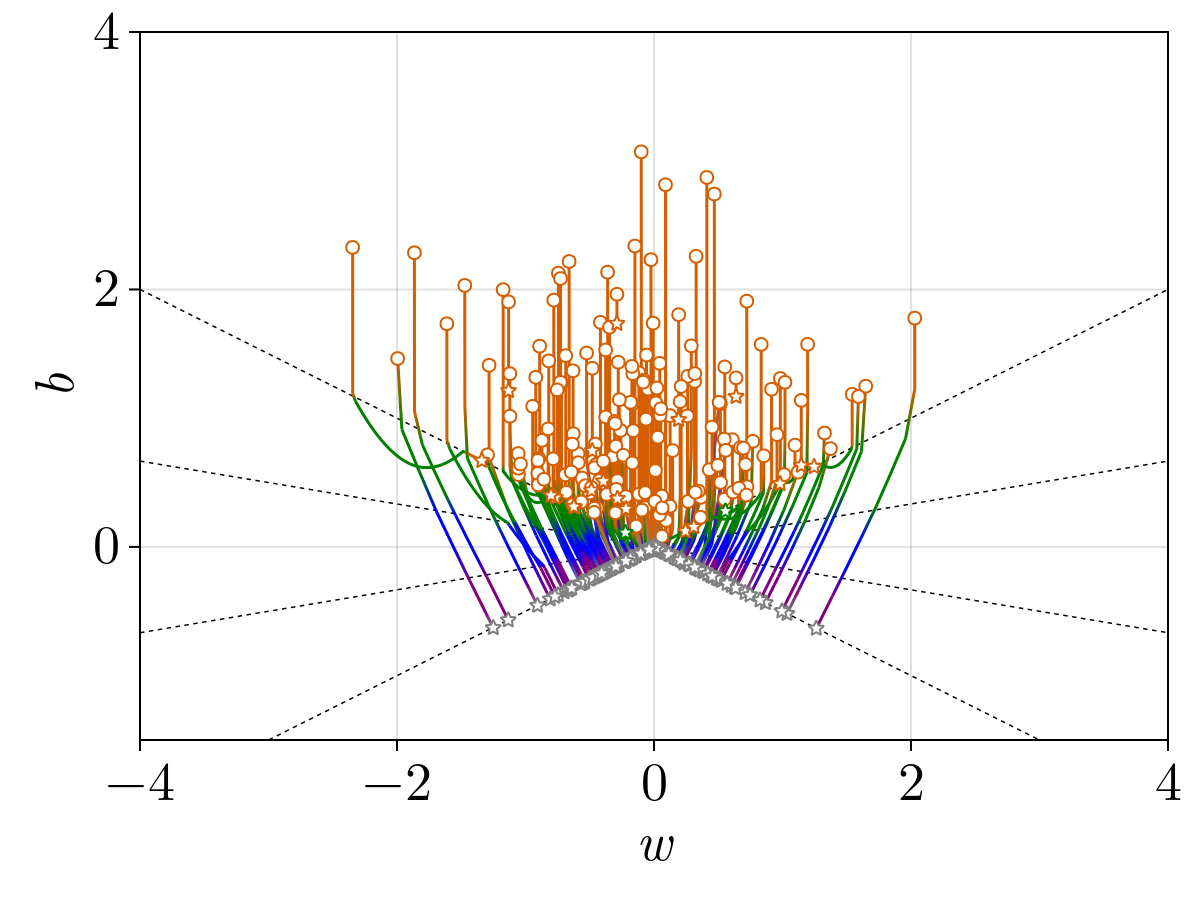

In [72]:
f = Figure()
ax = Axis(f[1, 1], xlabel=L"w", ylabel=L"b")

# Zone boundaries
ablines!(ax, 0, 1/2; linestyle=:dash, color=:black, linewidth=0.75)
ablines!(ax, 0, 1/6; linestyle=:dash, color=:black, linewidth=0.75)
ablines!(ax, 0, -1/6; linestyle=:dash, color=:black, linewidth=0.75)
ablines!(ax, 0, -1/2; linestyle=:dash, color=:black, linewidth=0.75)

# Neuron trajactories
for i in 1:size(w_data_pos_a, 1)
    lines!(ax, w_data_pos_a[i, :], b_data_pos_a[i, :], color=zone_neuron.(w_data_pos_a[i, :], b_data_pos_a[i, :])) 
end

# Initial positions
scatter!(ax, w_data_pos_a[:, 1], b_data_pos_a[:, 1], color=:white, strokewidth=1.0, strokecolor=zone_neuron.(w_data_pos_a[:, 1], b_data_pos_a[:, 1]))

# End points
scatter!(ax, w_data_pos_a[:, end], b_data_pos_a[:, end], marker=:star5, color=:white, strokewidth=1.0, strokecolor=zone_neuron.(w_data_pos_a[:, end], b_data_pos_a[:, end]))

xlims!(ax, -8, 8)
ylims!(ax, -1.5, 8)

# f |> display
f

In [71]:
save("trajecs orange neg a.pdf", f)

CairoMakie.Screen{PDF}


In [93]:
nn_data[end].a[mask]

21-element Vector{Float64}:
  -3.176366471645718
  -1.6419468570831328
  -2.2729017642529272
  -0.322592921039349
  -5.257273384019549
  -1.0320116198750093
  -0.19837202819454716
  -1.6970016443877498
   0.01540912548046179
  -1.2872159906331586
  -0.32482485160417
  -1.4071298270868884
  -2.081656718027099
  -0.3390780670045787
  -3.131551771891584
  -1.9537722728418478
  -3.9865460656296334
  -0.20950781046416772
  -6.8826896832777305
  -7.770966364808163
 -10.196484699460969

In [77]:
training_data.steps

10000